In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from timeit import default_timer as timer
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DSO 562/DSO 562 - Case 3 - DQR - Credit Card Transactions/card transactions.csv')

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2006-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2006-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2006-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [ ]:
len(df.columns)

10

In [ ]:
len(df)

96753

In [ ]:
df.shape

(96753, 10)

In [ ]:
df.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud'],
      dtype='object')

In [ ]:
df.dtypes

Recnum                        int64
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                   float64
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [ ]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20}
plt.rcParams.update({'figure.figsize':(12,6)})
plt.rcParams.update({'font.size':20})

# Recnum

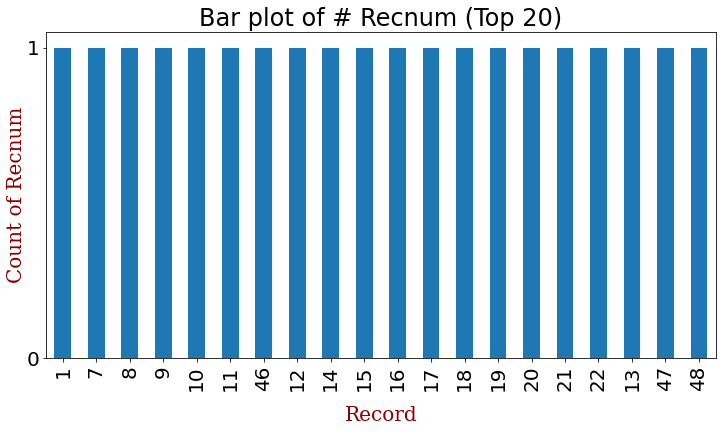

In [ ]:
# sns.set(font_scale=1.5)
# df['Recnum'].value_counts().head(15).plot(kind = 'bar')

# plt.xlabel(f'Record number Numbers\'s',fontdict=font)
# plt.ylabel(f'Count of Records',fontdict=font)
# plt.title(f'Top 15 Record Number\'s',fontdict=font)


# plt.savefig('Recnum 1', bbox_inches='tight')


df['Recnum'].value_counts().sort_values().head(20).plot(kind='bar')
plt.xlabel('Record',fontdict=font,labelpad=15)
plt.ylabel('Count of Recnum',fontdict=font,labelpad=0)
plt.title('Bar plot of # Recnum (Top 20)')
plt.yticks(np.arange(0,2, 1.0))
plt.show()

# Cardnum

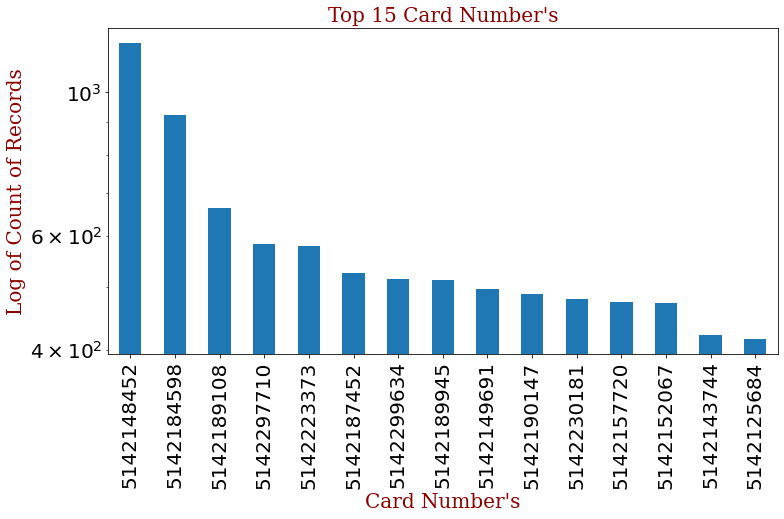

In [ ]:
col_head = 'Cardnum'


plt.yscale('log')

df[f'{col_head}'].value_counts().head(15).plot(kind = 'bar')

plt.xlabel(f'Card Number\'s',fontdict = font)
plt.ylabel(f'Log of Count of Records',fontdict = font)
plt.title(f'Top 15 Card Number\'s', fontdict = font)


plt.savefig(f'{col_head} 1', bbox_inches='tight')

# Date

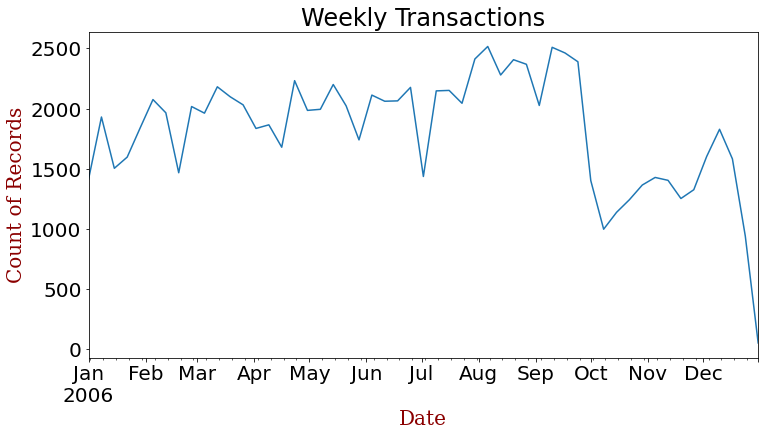

In [ ]:
numrecords = len(df)
weekly_count = df.assign(apps = np.ones(numrecords)).set_index(df['Date']).resample(dt.timedelta(days = 7))\
    .count().apps
weekly_count.plot(title = 'Weekly Tansactions')

plt.xlabel(f'Date',fontdict = font)
plt.ylabel(f'Count of Records',fontdict = font)
plt.title(f'Weekly Transactions')

plt.savefig('Date 1', bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


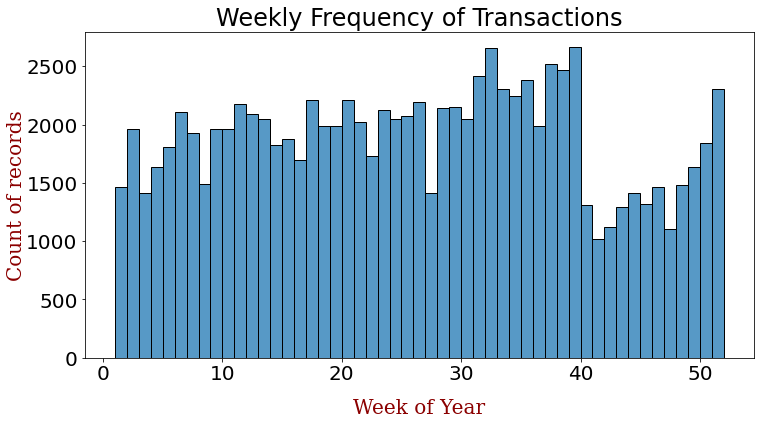

In [ ]:
sns.histplot(x=df.Date.dt.weekofyear)
plt.xlabel('Week of Year',fontdict=font,labelpad=15)
plt.ylabel('Count of records',fontdict=font,labelpad=0)
plt.title('Weekly Frequency of Transactions')

plt.show()

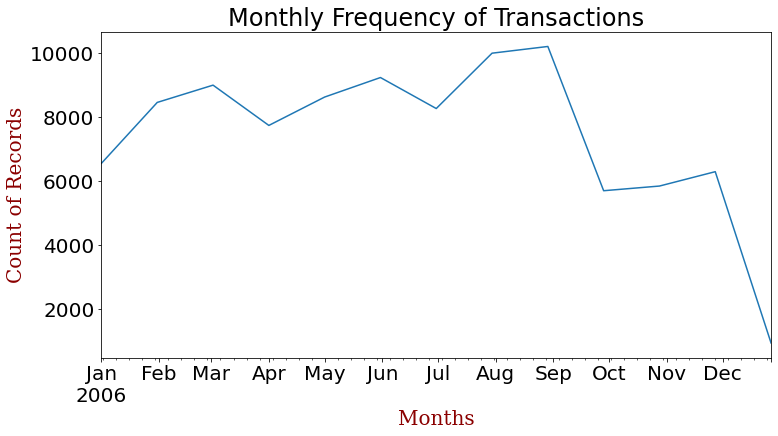

In [ ]:
numrecords = len(df)
weekly_count = df.assign(apps = np.ones(numrecords)).set_index(df['Date']).resample(dt.timedelta(days = 30))\
    .count().apps
weekly_count.plot(title = 'Monthly Tansactions')

plt.xlabel(f'Months',fontdict = font)
plt.ylabel(f'Count of Records',fontdict = font)
plt.title(f'Monthly Frequency of Transactions')

plt.savefig('Date 2', bbox_inches='tight')

In [ ]:
goods = df[df['Fraud'] == 0]
bads = df[df['Fraud'] == 1]
ngoods = len(goods)
nbads = len(bads)
print('number of fraudulent records',nbads,'which is approximately',round((nbads/len(df)*100),2),'%')

number of fraudulent records 1059 which is approximately 1.09 %


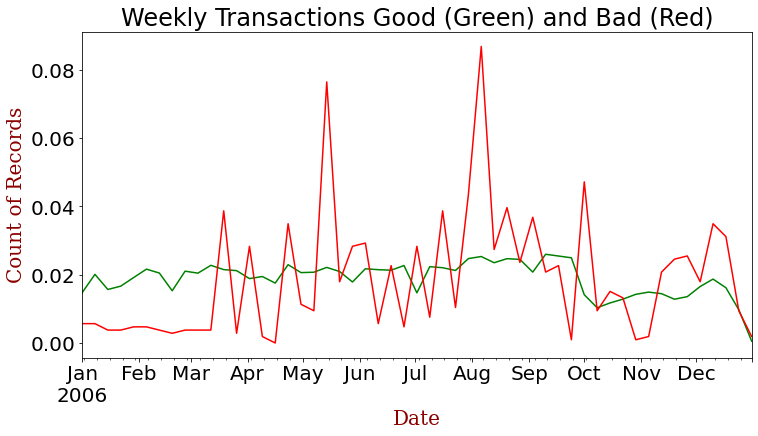

In [ ]:
N_day = 7

Duration_type = 'Weekly'

goods_series = goods.assign(apps = np.ones(ngoods)).set_index(goods['Date']).resample(dt.timedelta(days = N_day)).count().apps
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = f'{Duration_type} Transactions', color = 'green')
bads_series = bads.assign(apps = np.ones(nbads)).set_index(bads['Date']).resample(dt.timedelta(days = N_day)).count().apps
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

plt.xlabel(f'Date',fontdict = font)
plt.ylabel(f'Count of Records',fontdict = font)
plt.title(f'{Duration_type} Transactions Good (Green) and Bad (Red)')

plt.savefig('Date 3', bbox_inches='tight')

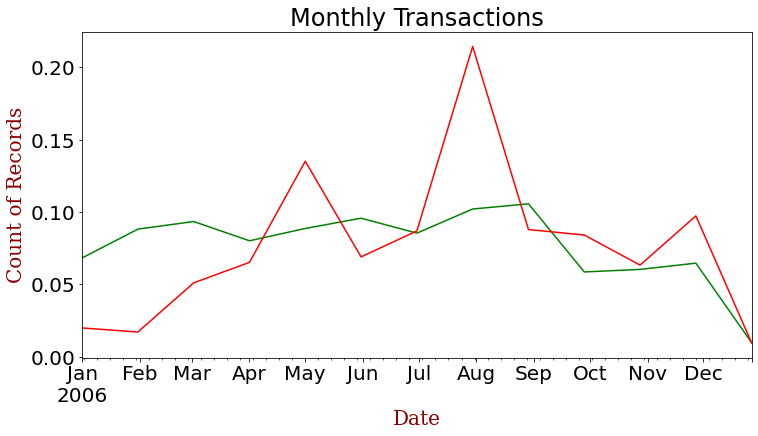

In [ ]:
N_day = 30

Duration_type = 'Monthly'

goods_series = goods.assign(apps = np.ones(ngoods)).set_index(goods['Date']).resample(dt.timedelta(days = N_day)).count().apps
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = f'{Duration_type} Transactions', color = 'green')
bads_series = bads.assign(apps = np.ones(nbads)).set_index(bads['Date']).resample(dt.timedelta(days = N_day)).count().apps
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

plt.xlabel(f'Date',fontdict = font)
plt.ylabel(f'Count of Records',fontdict = font)
plt.title(f'{Duration_type} Transactions')


plt.savefig('Date 3', bbox_inches='tight')

# Merchnum

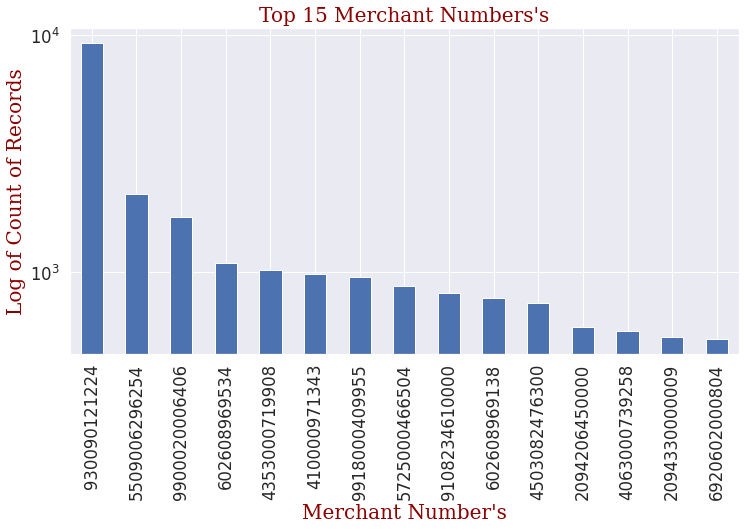

In [ ]:
col_head = 'Merchnum'
sns.set(font_scale=1.5)

plt.yscale('log')

df[f'{col_head}'].value_counts().head(15).plot(kind = 'bar')

plt.xlabel(f'Merchant Number\'s',fontdict = font)
plt.ylabel(f'Log of Count of Records',fontdict = font)
plt.title(f'Top 15 Merchant Numbers\'s', fontdict = font)


plt.savefig(f'{col_head} 1', bbox_inches='tight')

# Merch description

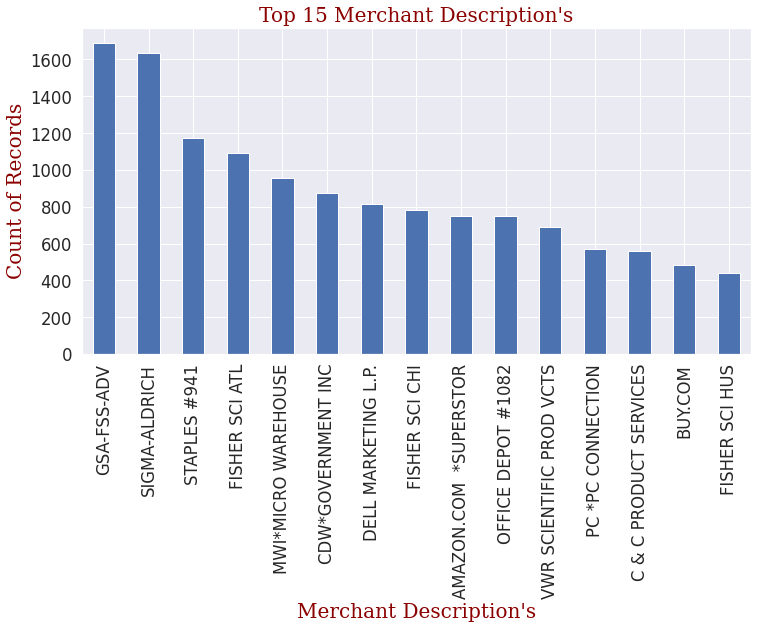

In [ ]:
col_head = 'Merch description'
sns.set(font_scale=1.5)

# plt.yscale('log')

df[f'{col_head}'].value_counts().head(15).plot(kind = 'bar')

plt.xlabel(f'Merchant Description\'s',fontdict = font)
plt.ylabel(f'Count of Records',fontdict = font)
plt.title(f'Top 15 Merchant Description\'s', fontdict = font)


plt.savefig(f'{col_head} 1', bbox_inches='tight')

# Merch state

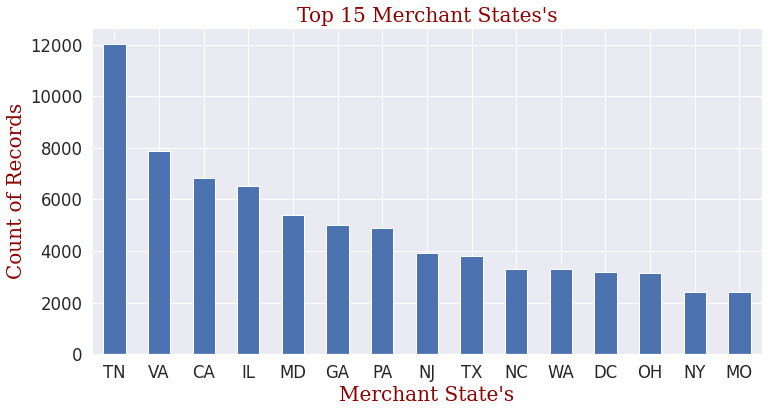

In [ ]:
col_head = 'Merch state'
sns.set(font_scale=1.5)

# plt.yscale('log')

df[f'{col_head}'].value_counts().head(15).plot(kind = 'bar')

plt.xlabel(f'Merchant State\'s',fontdict = font)
plt.ylabel(f'Count of Records',fontdict = font)
plt.title(f'Top 15 Merchant States\'s', fontdict = font)

plt.xticks(rotation=0)

plt.savefig(f'{col_head} 1', bbox_inches='tight')

# Merch zip

In [ ]:
df[col_head] = df[col_head].astype(str)
df[f'{col_head}'].value_counts()

TN     12035
VA      7872
CA      6817
IL      6508
MD      5398
       ...  
495        1
376        1
458        1
546        1
116        1
Name: Merch state, Length: 228, dtype: int64

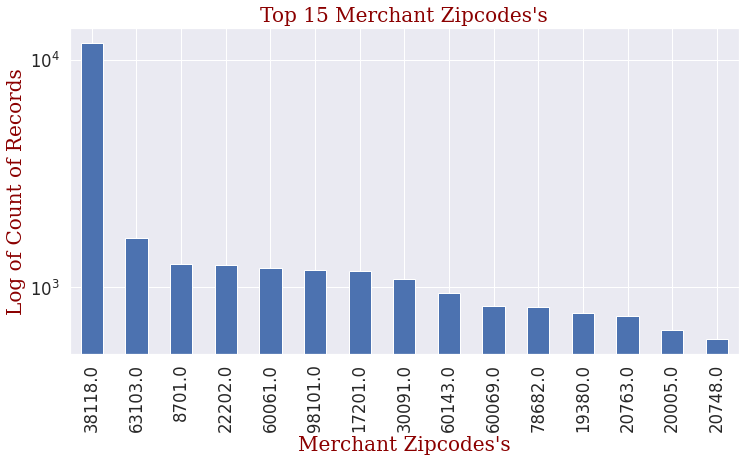

In [ ]:
col_head = 'Merch zip'
sns.set(font_scale=1.5)

plt.yscale('log')

df[f'{col_head}'].value_counts().head(15).plot(kind = 'bar')

plt.xlabel(f'Merchant Zipcodes\'s',fontdict = font)
plt.ylabel(f'Log of Count of Records',fontdict = font)
plt.title(f'Top 15 Merchant Zipcodes\'s', fontdict = font)

plt.xticks(rotation=90)

plt.savefig(f'{col_head} 1', bbox_inches='tight',transparent=True)

# Transtype

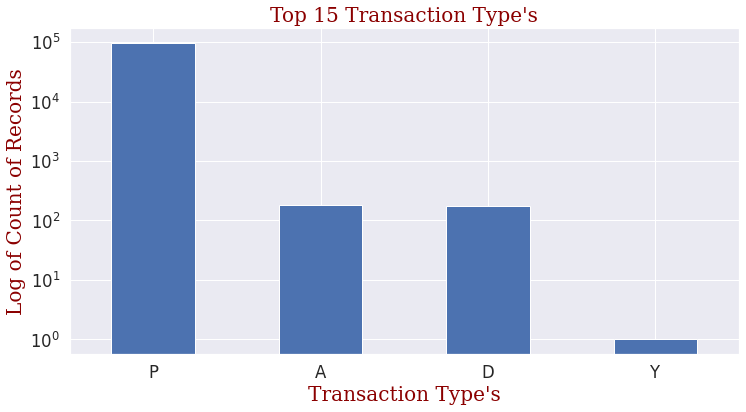

In [ ]:
col_head = 'Transtype'
sns.set(font_scale=1.5)

plt.yscale('log')

df[f'{col_head}'].value_counts().head(15).plot(kind = 'bar')

plt.xlabel(f'Transaction Type\'s',fontdict = font)
plt.ylabel(f'Log of Count of Records',fontdict = font)
plt.title(f'Top 15 Transaction Type\'s', fontdict = font)

plt.xticks(rotation=0)

plt.savefig(f'{col_head} 1', bbox_inches='tight')

# Amount ******

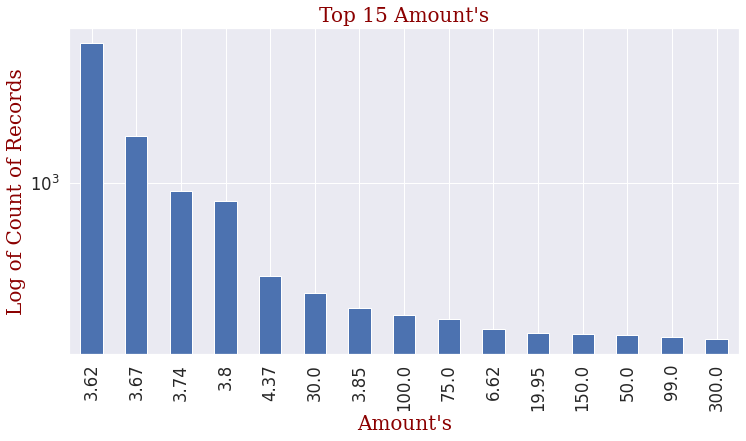

In [ ]:
col_head = 'Amount'
sns.set(font_scale=1.5)

plt.yscale('log')

df[f'{col_head}'].value_counts().head(15).plot(kind = 'bar')

plt.xlabel(f'{col_head}\'s',fontdict = font)
plt.ylabel(f'Log of Count of Records',fontdict = font)
plt.title(f'Top 15 {col_head}\'s', fontdict = font)


plt.savefig(f'{col_head} 1', bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


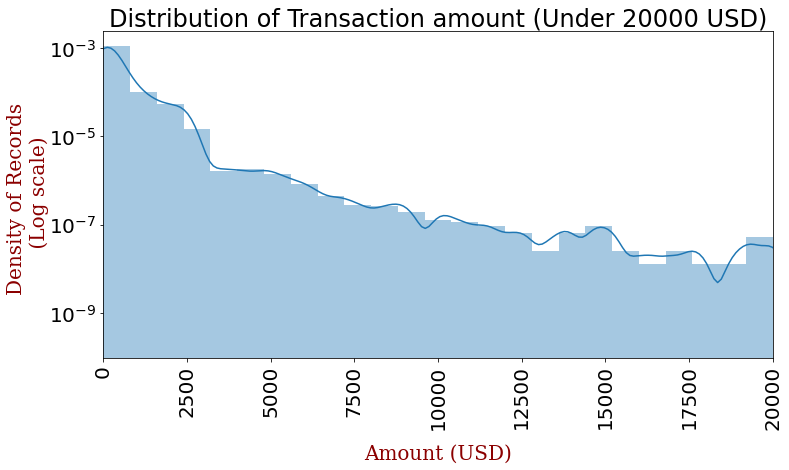

In [ ]:
# Looking at the most relevant range
xhigh = 20000
plt.xlim(0,xhigh)
temp = df[df['Amount'] <= xhigh]
sns.distplot(temp['Amount'],bins=25, kde_kws={"bw": 0.4})
plt.xlabel("Amount (USD)",fontdict=font,labelpad=15)
plt.ylabel('Density of Records \n (Log scale)',fontdict=font,labelpad=0)
plt.title("Distribution of Transaction amount (Under 20000 USD)")
plt.xticks(rotation = 90)
plt.yscale('log')

plt.savefig(f'{col_head} 2', bbox_inches='tight')


# Fraud

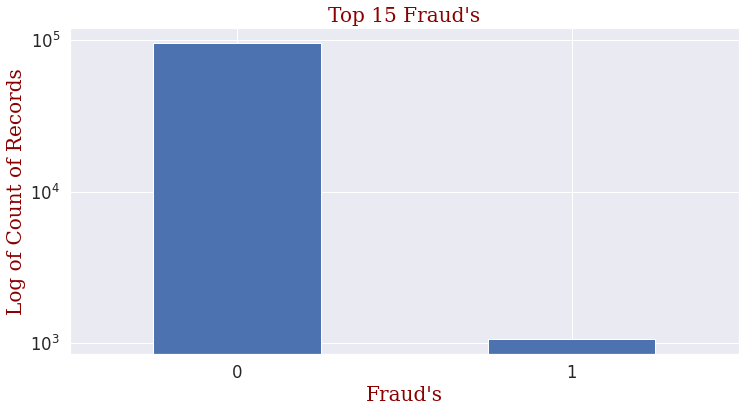

In [ ]:
col_head = 'Fraud'
sns.set(font_scale=1.5)

plt.yscale('log')

df[f'{col_head}'].value_counts().head(15).plot(kind = 'bar')

plt.xlabel(f'{col_head}\'s',fontdict = font)
plt.ylabel(f'Log of Count of Records',fontdict = font)
plt.title(f'Top 15 {col_head}\'s', fontdict = font)

plt.xticks(rotation=0)

plt.savefig(f'{col_head} 1', bbox_inches='tight')

# Tables

> ### Categorical Table







In [ ]:
Cat_fields = ['Recnum', 'Cardnum', 'Merchnum', 'Merch description',
              'Merch state', 'Merch zip', 'Transtype', 'Fraud']

In [ ]:
ctable = pd.DataFrame(index = Cat_fields)

In [ ]:
x=[]
for i in Cat_fields:
    x.append(len(df[i].unique()))
ctable['# Unique Values']= x

x=[]
for i in Cat_fields:
    if df[i].value_counts().iloc[0] == 1:
        x.append('All Unique')
    else:
        x.append(df[i].value_counts().index[0])
ctable['Most Common']= x

x=[]
for i in Cat_fields:
    if df[i].value_counts().iloc[0] == 1:
        x.append('-')
    else:
        x.append((df[i].value_counts().iloc[0]/numrecords))
ctable['Most Common % Total']= x

x=[]
for i in Cat_fields:
    x.append(len(df[i])/numrecords)
ctable['% Populated']=x

In [ ]:
ctable

,# Unique Values,Most Common,Most Common % Total,% Populated
Recnum,96753,All Unique,-,1.0
Cardnum,1645,5142148452,0.01232,1.0
Merchnum,13092,930090121224,0.096224,1.0
Merch description,13126,GSA-FSS-ADV,0.017446,1.0
Merch state,228,TN,0.124389,1.0
Merch zip,4568,38118.0,0.122663,1.0
Transtype,4,P,0.996331,1.0
Fraud,2,0,0.989055,1.0


In [ ]:
ctable.to_excel('HW8_DQR_CTable.xlsx')

> ### Numerical Table







In [ ]:
Num_fields = ['Date', 'Amount']

In [ ]:
Numerical_ = df[Num_fields].agg(['mean','std','max','min']).transpose()
Numerical_['%populated'] = round(df[Num_fields].count()/len(df),4)
Numerical_['%zero'] = round(df[Num_fields][df[Num_fields]==0].count()/len(df),4)
Numerical_

,mean,std,max,min,%populated,%zero
Date,2006-06-25 22:21:52.480232960,98 days 21:38:57.704372484,2006-12-31 00:00:00,2006-01-01 00:00:00,1.0,0.0
Amount,427.885677,10006.140302,3102045.53,0.01,1.0,0.0


In [ ]:
Numerical_.to_excel('HW8_DQR_NumTable.xlsx')

In [ ]:
for i in df.columns:
  print(i)

Recnum
Cardnum
Date
Merchnum
Merch description
Merch state
Merch zip
Transtype
Amount
Fraud
